### **Importing needed Libraries **

In [107]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
#for modeling we need:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf

In [80]:
ds=pd.read_csv('fer2013.csv')
ds.shape

(35887, 3)

the dataset contains: **35887 rows= 35887 pictures**
the dataset contains: **3 features:(emotion, pixels,usage) **

In [81]:
ds.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


### **Preprocessing the pixel data: **

In [108]:
width, height = 48, 48
pixels = ds['pixels'].tolist()
faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')]
    face = np.asarray(face).reshape(width, height)
    faces.append(face.astype('float32'))
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
faces /= 255.0

# **Encoding the emotion Labels:**

In [109]:
emotions=ds['emotion'].values
emotions=to_categorical(emotions)

Splitting the dataset into training, testing, and validation

In [110]:
usage=ds['Usage'].values
pic_train=faces[usage=='Training']
label_train=emotions[usage=='Training']
pic_test=faces[usage=='PrivateTest']
label_test=emotions[usage=='PrivateTest']
pic_validation=faces[usage=='PublicTest']
label_validation=emotions[usage=='PublicTest']

### **Model Building: **

In [111]:
model= Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
Early_stop=EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint=ModelCheckpoint('best_model.weights.h5', monitor='val_accuracy',
                           save_weights_only=True, mode='max')

### **Training the MODEL:**

In [49]:
history= model.fit(pic_train, label_train,
                   epochs=30,
                   validation_data=(pic_validation, label_validation),
                   batch_size=128,
                   callbacks=[Early_stop, checkpoint])

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 171s 748ms/step - accuracy: 0.2442 - loss: 2.1366 - val_accuracy: 0.1856 - val_loss: 3.2112
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 207s 769ms/step - accuracy: 0.3308 - loss: 1.6756 - val_accuracy: 0.2867 - val_loss: 2.4914
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 174s 773ms/step - accuracy: 0.3718 - loss: 1.5788 - val_accuracy: 0.4427 - val_loss: 1.4668
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 199s 758ms/step - accuracy: 0.4019 - loss: 1.5131 - val_accuracy: 0.4416 - val_loss: 1.4464
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 170s 755ms/step - accuracy: 0.4199 - loss: 1.4703 - val_accuracy: 0.4363 - val_loss: 1.4853
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 196s 728ms/step - accuracy: 0.4425 - loss: 1.4209 - val_accuracy: 0.4773 - val_loss: 1.3513
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 206s 747ms/step - accuracy: 0.4592 - loss: 1.3898 - val_accuracy: 0.5001 - val_loss: 1.3134
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 205s 764ms/step - accuracy: 0.4759 -

# Evaluating the Model:

In [112]:
test_loss, test_accuracy= model.evaluate(pic_test, label_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.1544 - loss: 1.9482
Test Loss: 1.9491416215896606
Test Accuracy: 0.15268877148628235


# **Visualize Training History: **

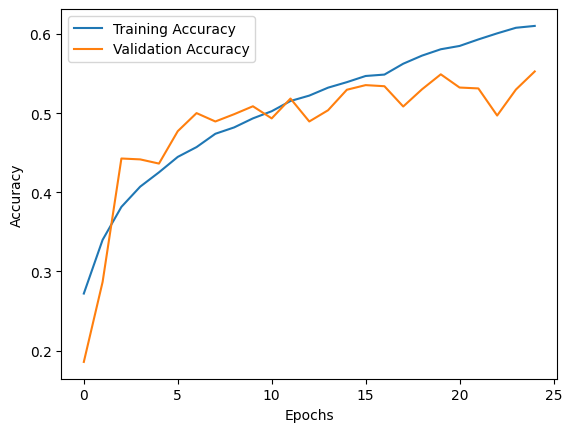

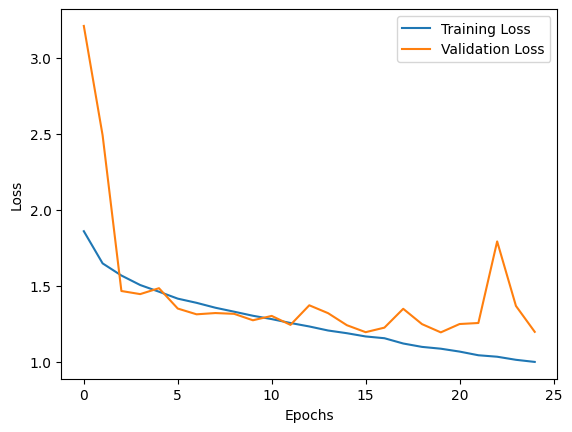

In [113]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Making Predictions: **

In [114]:
import cv2
new_image = cv2.imread('sad_face.jpeg')
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
new_image = cv2.resize(new_image, (48, 48))
new_image = new_image / 255.0
new_image = new_image.reshape(1, 48, 48, 1)
prediction = model.predict(new_image)
predicted_emotion = np.argmax(prediction)
print(predicted_emotion)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
print(emotion_labels[predicted_emotion])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
4
Sad
